### Setting up optimization problem and Faster training

### Normalization or Standardization of Inputs
    When training a neural network, one of the techniques to speed up your training is if you normalize your inputs. Speeding up the training necessarily means making the cost function to optimize faster
    
    For eg, lets consider training sets with two input features. The input features X are two-dimensional and here's a scatter plot of your training set(the left first plot). 
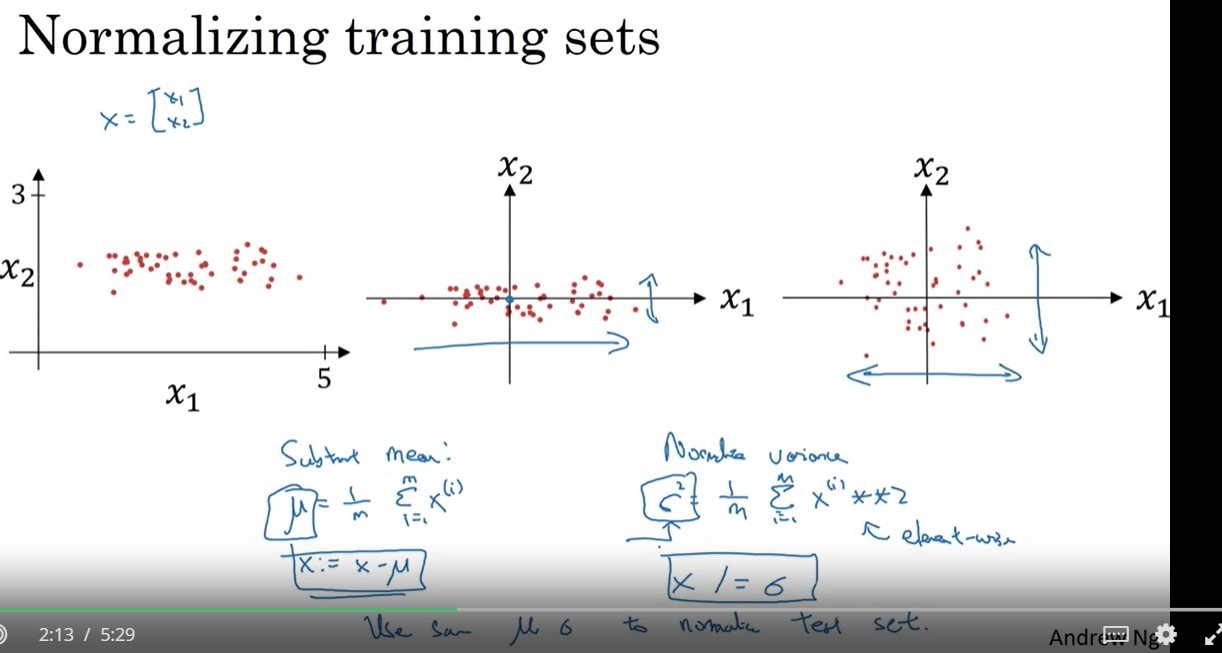

    Normalizing your inputs corresponds to two steps:
        - First is to subtract out the mean or to zero out the mean
        - Second step is to normalize the variances.
        
                                    mu = 1 / m Σ x_i
                    
            For every training example x =  x - mu
            
       This means that you just move the training set until it has zero mean or mean of Zero. All the training examples are centered around zero which is the mean of all those training examples.
        
      To normalize the variances, Notice here that the feature x_1 has a much larger variance than the feature x_2 here. 
      
                          sigma**2 = 1 / m Σ x_i**2
                          
                          x_i =  x_i / sigma
          
          Now sigma squared is a vector with the variances of each of the features. Notice we've already subtracted out the mean, so here while normalizing variance, x_i is nothing but (x_i-mu). 
          
          You take each example and divide it by this vector sigma. Now you end up with where now the variance of x_1 and x_2 are both equal to one.(see the spread across each feature)
       
       
       Note: If you scale your training data, then use the same mu and sigma to normalize your test set. In particular, you don't want to normalize the training set and a test set differently. Whatever the values mu and sigma be, use them in these two formulas so that you scale your test set in exactly the same way rather than estimating mu and sigma squared separately on your training set and test set, because you want your data both training and test examples to go through the same transformation defined by the same Mu and Sigma squared calculated on your training data. 

         Why do we do this? Why do we want to normalize the input features? 
       ------------------------------------------------------------------
       Recall that the cost function is defined as J = 1/m Σi=1tom L(y'i, yi)
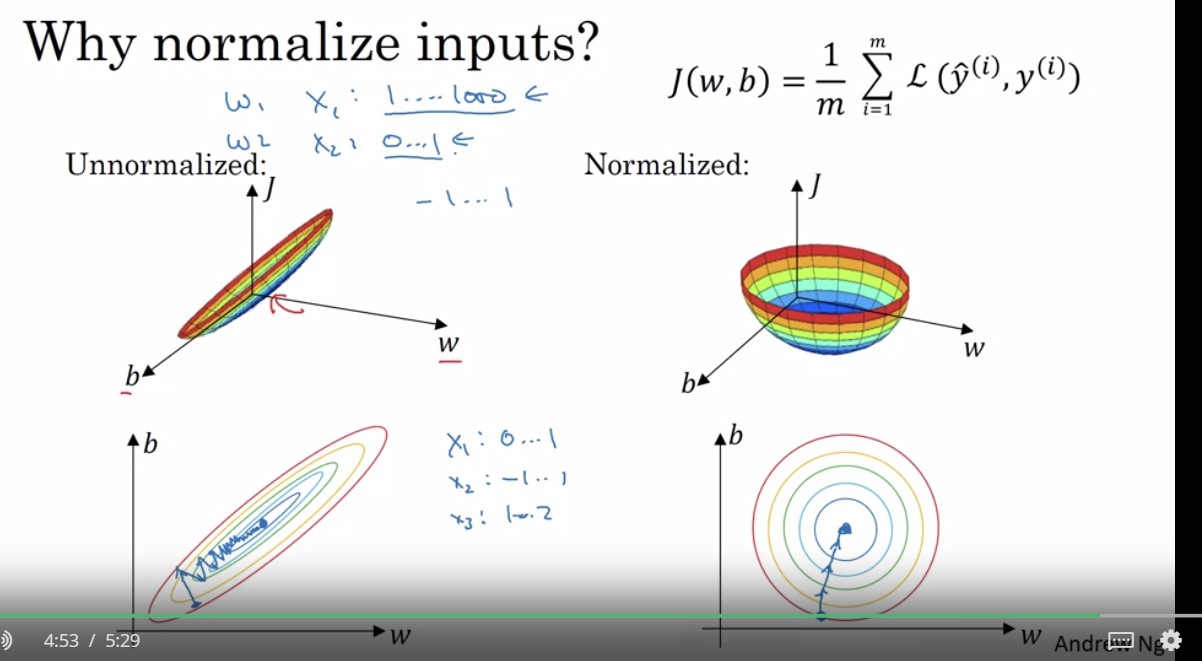
       
       It turns out that if you use unnormalized input features, it's more likely that your cost function will look like the one in the top left side, like a very squished out bar, very elongated cost function where the minimum you're trying to find is maybe over there in red arrow. If your features are on very different scales, say the feature x_1 ranges from 1-1,000 and the feature x_2 ranges from 0-1, then it turns out that the ratio or the range of values for the parameters w_1 and w_2 will end up taking on very different values. Maybe these axes in the plot should be w_1 and w_2, but the intuition of plot w, b, cost function J can be very elongated bow like that. If you plot the contours of this function(bottom left), you can have a very elongated function like that. If you are running gradient descent on a cost function like the one on the left, then you might have to use a very small learning rate because if you're at the blue dot, the gradient decent might need a lot of steps to oscillate back and forth before it finally finds its way to the minimum. 
       
       The gradient descent oscillates  back and forth because, W ranges are completely different for these unnormalized features, one will be in larger range and one will be smaller range, and also bcoz we multiply the input feature xi to gradient, the gradients also take different ranges. For gradient with larger ranges, the W is updated fastly w - alpha * larger gradient and comes to its closer final state fastly. This makes the cost function oscillate too much. Where as other feature weights are updated very slowly and the learning becomes very slow for this small range feature. This entirely makes the learning slower.
       
       
       Whereas if you normalize the features, then your cost function will on average look more symmetric(top right) and the contours looks more spherical. If you have more spherical contours, then wherever you start, gradient descent can pretty much go straight to the minimum. You can take much larger steps for gradient descent, rather than needing to oscillate around like the picture on the left. Of course, in practice, w is a high dimensional vector. Trying to plot this in 2D doesn't convey all the intuitions correctly. 
       
       But the rough intuition that you cost function will be in a more round and easier to optimize when you're features are on similar scales. Eg instead of different scales 1-1000, 0-1, all scales in the range mostly like -1 to 1 or about similar variance as each other. That just makes your cost function J easier and faster to optimize.
       
       In practice, if one feature, say x_1 ranges from 0 to 1 and x_2 ranges from -1 to 1, and x_3 ranges from 1 to 2, these are fairly similar ranges, so this will work just fine. But when they are on dramatically different ranges like ones from 1-1000 and another from 0-1, that really hurts your optimization algorithm. Thus by just setting all of them to 0 mean and say variance 1 , that just guarantees that all your features are in a similar scale and will usually help you learning algorithm run faster.  If your features came in on similar scales, then this step is less important although performing this type of normalization pretty much never does any harm. Often you'll do it anyway, even if you are not sure whether or not it will help with speeding up training for your algorithm.
       
       If you want more info on how normalizing the scales of all features helps in optimization, look in ML Spec course where we derived that different scaled input slows down the optimization(cuz the inputs are multiplied to the gradients while optimizing).
       
       Next, let's keep talking about ways to speed up the training of your neural network.

### Vanishing and Exploding Gradients:

    One of the problems of training neural network, especially very deep neural networks, is vanishing and exploding gradients. What that means is, when you're training a very deep network your derivatives or your slopes can sometimes get either very, very big or very, very small, maybe even exponentially small, and this makes training difficult.
    
    
    Consider a very deep network like below. For simplicity, we used 2 units in each layer but the same explanation translates true to the network having many neurons in each layer too.
    
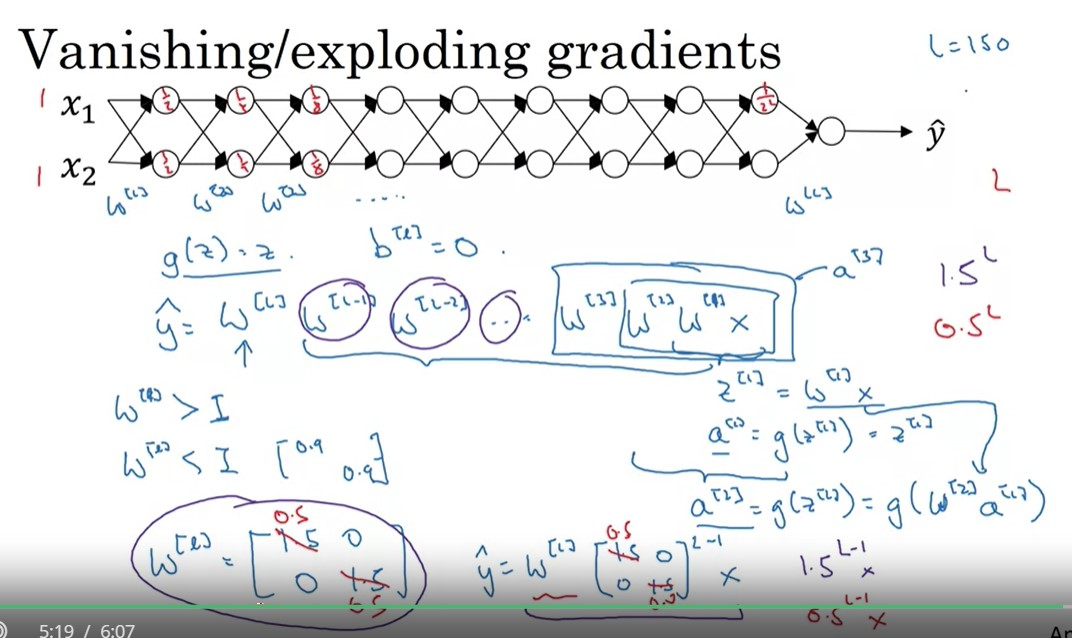
    
    Lets imagine, the activation function we use is linear activation function for simplicity.
    
            g(z) = z
            
    Each layer will have a weight vector W of shape (2, 2) 2 rows and 2 columns. Lets make b to zero
    
    If we observe, for an example, the output y' (yhat) is like composite function
    
$\hat y = W^{[L]}(W^{[L-1]}(W^{[L-2]}(....... W^{[3]}(W^{[2]}(W^{[l]}X)))))$

where as,
For layer 1, $W^{[1]}X = Z^{[1]} \\
              g(Z^{[1]}) = Z^{[1]} = A^{[1]}$
                      
For layer 2, $W^{[2]} A^{[1]} = W^{[2]} Z^{[1]} =  W^{[2]} W^{[1]}X = Z^{[2]} \\
              g(Z^{[2]}) = Z^{[2]} = A^{[2]}  $ 
              
For layer 3, $W^{[3]} A^{[2]} = W^{[3]} Z^{[2]} =  W^{[3]} W^{[2]} A^{[1]} = W^{[3]} W^{[2]} W^{[1]}X =  Z^{[3]} \\
              g(Z^{[3]}) = Z^{[3]} = A^{[3]}  $ 
              
    That's how each layer activation is a function of previous layers composite activations and the same is applied to all the layers until the last layer L
    
    Now for this network, the W vector is of same shape for all the layers except the last layer whose dimension is different from other layers (shape of (1, 2) for sigmoid unit)
    
    
#### Exploding Gradients:
    Lets imagine all the b's are zero and W vectors of all the layers except layer L is slight greater than the Identity Matrix I
            
So, each W = $ \begin{bmatrix}
1.5 & 0\\
0 & 1.5
\end{bmatrix}$
    
So now $\hat y$ can be written as $\hat y = W^{[L]} W^{[l-1]}X$

$\hat y = W^{[L]} \begin{bmatrix}
1.5 & 0\\
0 & 1.5
\end{bmatrix}^{[l-1]}X$

$\hat y = W^{[L]} 1.5^{[l-1]} X$ cuz for a matrix K, K * I = K 

If we ignore $W^{[L]}$ dimension for a while, then we get $\hat y$ as
    
$\hat y = 1.5^{[l-1]} X$

If the network is very deep, the $\hat y$ will be very larger, cuz it is a function of number of layers l.

If the network is very deep, then that means L was large for very deep neural network. This makes $\hat y$ to be very large. In fact, it just grows exponentially, it grows like 1.5 to the number of layers $1.5^L$. 

    And so if you have a very deep neural network, the "activations" explode for all the layers when your W is larger than I and eventually the value of Yhat will explode. We can also see it as, when the activation at each layer is exploding, this exploding activation serves as input to next layer which makes the next layers activation explode and this("Exploding activations") keeps on happening during forward pass. 
    
    This also  applies for gradients as well but in reverse direction of backprop
    
    When training a deep neural network with gradient based learning and backpropagation, we find the partial derivatives by traversing the network from the the final layer (y_hat) to the initial layer. Just like forward prop, the backprop also uses the chain rule of composite functions. Layers that are deeper into the network go through continuous matrix multiplications in order to compute their derivatives.

    Since the gradient is also a composite function that traverse in backward direction from output layer to input layer, as we backpropagate, if the gradients are larger and bcuz the gradients from the previous layers are multiplied together, they keep on getting bigger and bigger exponentially until it reaches the input layer. This way Gradient explodes. This is Exploding Gradients Problem.
    
    Some tips to detect exploding gradients problem:
    --------------------------------------------------------------------
    - When the model is not learning much on the training data therefore resulting in a poor loss.
    - The model will have large changes in loss on each update due to the models instability.
    - The models loss will be NaN during training.

    When faced with these problems, to confirm whether the problem is due to exploding gradients, there are some much more transparent signs, for instance:

    - Model weights grow exponentially and become very large when training the model.
    - The model weights become NaN in the training phase.
    - The derivatives are constantly increasing
    
https://medium.com/geekculture/how-to-deal-with-vanishing-and-exploding-gradients-in-neural-networks-24eb00c80e84

#### Vanishing Gradients

    Now, conversely, if we replace the W matrix this with 0.5, something less than 1, then 
    
So, each W = $ \begin{bmatrix}
0.5 & 0\\
0 & 0.5
\end{bmatrix}$
    
So now $\hat y$ can be written as $\hat y = W^{[L]} W^{[l-1]}X$

$\hat y = W^{[L]} \begin{bmatrix}
0.5 & 0\\
0 & 0.5
\end{bmatrix}^{[l-1]}X$

$\hat y = W^{[L]} 0.5^{[l-1]} X$
    
    
    If the network is very deep, then that means L was large for very deep neural network. This makes $\hat y$ to be very small. In fact, it just reduces exponentially, it reduced like 0.5 to the number of layers $0.5^L$.
    
    Note, again ignoring WL. And so each of your matrices are less than 1, then let's say input layer X1=1, X2=1.
    
    Then the activations in the first layer will be one half, one half(0.5^1 * 1), second layer - one fourth, one fourth, third layer - one eighth, one eighth, and so on until this becomes one over two to the L (1/2^L)(look into the image above). So the activation values will decrease exponentially as a function of the number of layers L of the network. If the activations are decreasing exponentially until the last layer, then it is because the weights are smaller and the layers are deeper. This can be seen Vanishing activations problem 
    
     Eventhough here, we went through this argument of Vanishing and exploding in terms of activations increasing or decreasing exponentially as a function of L, a similar argument can be used to show that the derivatives or the gradients the computer is going to send will also increase exponentially or decrease exponentially as a function of the number of layers L. 
     
     In summary, if W is slightly greater than I i.e W > I, then exploding activations(or similarly gradients) problem may occur
    Conversely, if W is slighlty lesser than I i.e W < I, then vanishing gradients/activations problem may occur.
    
    To explain Exploding gradient problem in short, Because we multiply the weights to the gradients (dA, dZ, dW, db), if the weights are larger, then gradients become larger, and as the layers are increasing and getting deeper and because of composite nature, the gradients become larger and larger.
    
    To explain Vanishing gradient problem in short, Because we multiply the weights to the gradients (dA, dZ, dW, db), if the weights are smaller, then gradients become smaller, and as the layers are increasing and getting deeper and because of composite nature, the gradients become smaller and smaller.
    
    Note there could be other factors as well other than weights that cause this vanishing and exploding gradients. For suppose, if the input features range is very big, that also sometimes causes the same problem. If the input features have a wide range of values, and you’re using a fixed learning rate, it can be difficult to find a learning rate that is large enough to converge in a reasonable amount of time but isn’t so large as to cause their gradients to explode.
     
     
    There are also ways to detect whether your deep network is suffering from the vanishing gradient problem
    ----------------------------------------------------------------------------------------------------------

    - The model will improve very slowly during the training phase and it is also possible that training stops very early, meaning that any further training does not improve the model.
    - The weights closer to the output layer of the model would witness more of a change whereas the layers that occur closer to the input layer would not change much (if at all).
    - Model weights shrink exponentially and become very small when training the model.
    - The model weights become 0 in the training phase.
     
     Saturated activation functions like sigmoid and tanh suffers more with these kind of problems. If thier input activation(Z as well as W) is very small or very large, the gradients also becomes saturated and very small, close to zero resulting in vanishing gradients, Small gradients will slow down the learning process rapidly as the gradient descent takes smaller and smaller steps.
     
     With some of the modern neural networks, L = 150, Microsoft recently got great results with 152 layer neural network. But with such a deep neural network, if your activations or gradients increase or decrease exponentially as a function of L, then these values could get really big or really small. And this makes training difficult, especially if your gradients are exponentially smaller than L, then gradient descent will take tiny little steps. It will take a long time for gradient descent to learn anything. 
     
     Self note: If the weights are getting larger and larger, then exploding activations occurs. As well as exploding gradients, cuz remember? Gradients also depends on weights (dA, dZ, dW, db). If the gradients are getting larger, then it explodes overtime because of composite nature. Similary, vanishing gradients occurs, when weights are getting smaller.
     
     
     In fact, for a long time this problem was a huge barrier to training deep neural networks. It turns out there's a partial solution that doesn't completely solve this problem but it helps a lot which is careful choice of "how you initialize the weights" 
     
https://www.deeplearning.ai/ai-notes/initialization/index.html

### Weight Initializations to handle vanishing and exploding gradients
    As we know deep neural networks can have the problems of vanishing and exploding gradients. It turns out that a partial solution to this, doesn't solve it entirely but helps a lot, is better or more careful choice of the random initialization of your parameters for your neural network. 
    
    To understand this, let's start with the example of initializing the ways for a single neuron, and then we're go on to generalize this to a deep network. 
    
    Let's go through this with an example with just a single neuron, and then we'll talk about the deep net later. So with a single neuron, you might input four features, x1 through x4, and then you have some a=g(z) and then it outputs some y. 
                        We know z =  w1x1 + w2x2 + w3x3 + w4x4 +.. + wnxn for n inputs
    
    Let's just ignore b for now so b=0. 
    
    In order to make z not blow up and not become too small, you notice that the larger n is, the smaller you want Wi to be, right?
    Because z is the sum of the WiXi. And so if you're adding up a lot of these terms, you want each of these terms to be smaller. 
    
    
    One reasonable thing to do would be to set the variance of W to be equal to 1 over n (1/n), where n is the number of input features that's going into a neuron. 
    
    So in practice, what you can do is set the weight matrix W for a certain layer to be:
    
$W^{[l]} = np.random.randn(n^{[l]}, n^{[l-l]}) *  np.sqrt(1 / n^{[l-1]})$ 

    np.random.randn() and then whatever the shape of the matrix is for this out here, and then times square root of 1 over the number of features that I fed into each neuron in layer l. So there's going to be n[l-1] because that's the number of units that I'm feeding into each of the units in layer l. 
    
    This is called "Xavier Initialization"
    
    So, basically waht we are doing is, we want to reduce the scale or variance of W by multiplying it with a small number.
    
    It turns out that if you're using a ReLu activation function that, rather than 1 / n, it turns out that, set in the variance of 2 / n works a little bit better. So you often see that in initialization, especially if you're using a ReLu activation function.
    
For Relu, $W^{[l]} = np.random.randn(n^{[l]}, n^{[l-l]}) *  np.sqrt(2 / n^{[l-1]})$ 

    This variant of initialization is also called "He Initialization" and this by a paper by her et al. 
    
    
    If the input features or activations are roughly mean 0 and standard variance i.e variance 1, then with better W intialization, this would cause z to also take on a similar scale. 
    
    And this doesn't solve, but it definitely helps reduce the vanishing, exploding gradients problem, because it's trying to set each of the weight matrices W, you know, not too much bigger than 1 and not too much less than 1 so it doesn't explode or vanish too quickly. 
    
    
    I've just mention some other variants. The version we just described is assuming a ReLu activation function 
    
    For tanh as an activation function, it is shown that usual below initialization worked really well compared to the ReLu variant
   
   $W^{[l]} = np.random.randn(n^{[l]}, n^{[l-l]}) *  np.sqrt(1 / n^{[l-1]})$ 
   
   
    This is called "Xavier initialization". 
   
   
    There are many varaints Yoshua Bengio and his colleagues, use the below formula, 
    
$W^{[l]} = np.random.randn(n^{[l]}, n^{[l-l]}) *  np.sqrt(2 / (n^{[l-1]} + n^{[l]}))$ 
   
    But I would say if you're using a ReLu activation function, which is really the most common activation function, 
    
        Relu - He Intialization
        Tanh - Xavier Initialization
        
   
    But in practice I think all of these formulas just give you a starting point. It gives you a default value to use for the variance of the initialization of your weight matrices.
    
    If you wish the variance here, this variance parameter could be another thing that you could tune with your hyperparameters. So you could have another parameter that multiplies into this formula and tune that multiplier as part of your hyperparameter surge. 
    
    Sometimes tuning the hyperparameter has a modest size effect. It's not one of the first hyperparameters I would usually try to tune, but I've also seen some problems where tuning this helps a reasonable amount. 
    
    But this is usually lower down for me in terms of how important it is relative to the other hyperparameters you can tune. So I hope that gives you some intuition about the problem of vanishing or exploding gradients as well as choosing a reasonable scaling for how you initialize the weights. Hopefully that makes your weights not explode too quickly and not decay to zero too quickly, so you can train a reasonably deep network without the weights or the gradients exploding or vanishing too much. 
    
    When you train deep networks, this is another trick that will help you make your neural networks trained much more quickly which is Gradcheck. We ll discuss more about this in the next notebook
    

**Here are some other strategies to deal with vanishing and exploding gradient problems:**

###### 1.  Weight Initialization: 
    As we have seen before, Proper weight initialization techniques, such as Xavier/Glorot initialization or He initialization, can help alleviate both problems by setting initial weights to values that balance the gradients during training.


###### 2. Activation Functions: 
    Choose activation functions like ReLU, Leaky ReLU, or variants that have gradients that do not vanish as quickly as sigmoid or tanh.


###### 3. Batch Normalization: 
    Batch normalization can help stabilize the training process by normalizing activations within each mini-batch, which can mitigate gradient-related issues. We ll see about this in the next week


###### 4. Gradient Clipping: 
    Gradient clipping, which involves scaling the gradients to a certain threshold during training to prevent them from becoming too large.

###### 5. Skip Connections: 
    Architectures like residual networks (ResNets) use skip connections to bypass certain layers, which can help gradients flow more easily through the network.


###### 6. Careful Network Design: 
    Reducing the depth of the network or using techniques like LSTM and GRU in RNNs can also help mitigate gradient problems.

### Lab 

### Initialization and Normalization
    Welcome to the first assignment of Improving Deep Neural Networks!

    Training your neural network requires specifying an initial value of the weights. A well-chosen initialization method helps the learning process.(by avoiding vanishing and exploding gradients)

    If you completed the previous week course of this specialization, you probably followed the instructions for weight initialization, and seen that it's worked pretty well so far. But how do you choose the initialization for a new neural network? In this notebook, you'll try out a few different initializations, including random, zeros, and He initialization, and see how each leads to different results.

    A well-chosen initialization can:
        - Speed up the convergence of gradient descent
        - Increase the odds of gradient descent converging to a lower training (and generalization) error
        
    Let's get started!

**Table of Contents**
- 1 - Packages
- 2 - Loading the Dataset
- 3 - Neural Network Model
- 4 - Zero Initialization
    - Exercise 1 - initialize_parameters_zeros
- 5 - Random Initialization
    - Exercise 2 - initialize_parameters_random
- 6 - He Initialization
    - Exercise 3 - initialize_parameters_he
- 7 - Conclusions


In [61]:
#packages
import numpy as np
import matplotlib.pyplot as plt
import copy
import sklearn
from sklearn import datasets

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (7.0, 4.0)
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "nearest"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


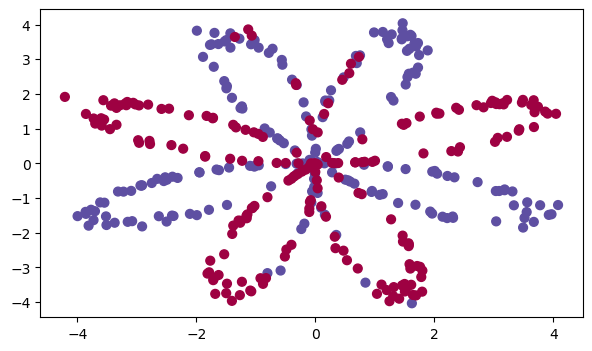

In [63]:
#Load the planar data set
def load_planar_data():
    np.random.seed(1)
    m = 400
    n = 2
    classes = 2
    N = int(m/2)
    a = 4
    X = np.zeros((m, n))
    y = np.zeros((m, 1))
    for j in range(classes):
        idxs = range(j*N, (j+1)* N) #0-200, 200-400
        theta = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N) * 0.2
        radius = a * np.sin(4 * theta) + np.random.randn(N) * 0.2
        X[idxs] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
        y[idxs] = j
        
    X = X.T
    y = y.T
    return X, y

X, y = load_planar_data()
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral_r)
plt.show()

In [1]:
#Load the circles data(train and test) for this lab
import sklearn
def load_data():
    #train data
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(300, noise=0.05)
    #test data
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(100, noise=0.05)
    
    #plot the training data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral_r)
    plt.xlabel(r"$X_1$")
    plt.ylabel(r"$X_2$")
    plt.show()
    
    #transpose and reshape
    train_X = train_X.T
    train_Y = train_Y.reshape(1, -1)
    test_X = test_X.T
    test_Y = test_Y.reshape(1, -1)
    
    return train_X, test_X, train_Y, test_Y

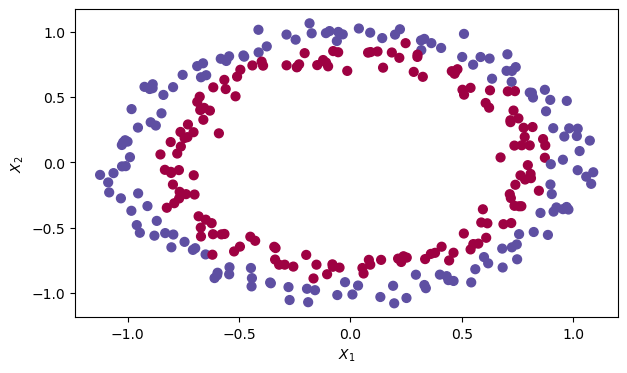

In [65]:
#get the data
train_X, test_X, train_Y, test_Y = load_data()

In [58]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

#no need to normalize further as we are already having the data with 0 mean and 1 sd

(2, 300)
(1, 300)
(2, 100)
(1, 100)


#### 3 - Neural Network Model
    You'll use a below 3-layer neural network (already implemented for you). These are the initialization methods you'll experiment with:

    Zeros initialization -- setting initialization = "zeros" in the input argument.
    Random initialization -- setting initialization = "random" in the input argument.This initializes the weights to large random values.
    He initialization -- setting initialization = "he" in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015.
    
    
    First let create the nueral network model with 3 layers.

In [171]:
def sigmoid(Z):
    A = 1/(1 + np.exp(-Z))
    return A

def relu(Z):
    A = np.maximum(0, Z)
    return A

def forward_propagation(X, parameters):
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1 ,m), dtype = np.int32)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0, :] == y[0, :]))))
    
    return p

def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5).astype("int")
    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

#Model
def model(X, Y, learning_rate = 0.01, num_iters=15000, print_cost=False, initialization="He"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iters  -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    params -- parameters learnt by the model
    """
    layers_dims = [X.shape[0], 10, 5, 1]
    costs = []
    grads = {}
    
    # Initialize parameters dictionary
    if initialization == "zeros":
        params = initialize_parameters_zeros(layers_dims)
    if initialization == "random":
        params = initialize_parameters_random(layers_dims)
    if initialization == "He":
        params = initialize_parameters_he(layers_dims)
    
    #Training loop gradient descent
    for i in range(num_iters):
        AL, cache = forward_propagation(X, params)
        cost = compute_loss(AL, Y)
        grads = backward_propagation(X, Y, cache)
        params = update_parameters(params, grads, learning_rate)
        
        if i % 1000 == 0 or i == num_iters - 1:
            costs.append(np.squeeze(cost)) 
            
            if print_cost:
                print(f"Iteration {i}, Cost: {np.squeeze(cost)}")
                
    #Plot the loss
    plt.plot(costs)
    plt.xlabel("Iterations per(1000's)")
    plt.ylabel("Cost")
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return params

### 4 - Zero Initialization
    There are two types of parameters to initialize in a neural network:

            the weight matrices 
            the bias vectors 

#### Exercise 1 - initialize_parameters_zeros
    Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry," but try it anyway and see what happens. Use np.zeros((..,..)) with the correct shapes.

In [225]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    L = len(layers_dims) - 1 #-1 is to remove the input layer
    params = {}
    for l in range(L):
        params["W"+str(l+1)] = np.zeros((layers_dims[l+1], layers_dims[l]))
        params["b"+str(l+1)] = np.zeros((layers_dims[l+1], 1))
    return params

In [90]:
#test the function
layers_dims = [20, 10, 5, 1]
params = initialize_parameters_zeros(layers_dims) 
print(params.keys())
print(params["W1"].shape)
print(params["W2"].shape)
print(params["W3"].shape)
print(params["b1"].shape)
print(params["b2"].shape)
print(params["b3"].shape)

print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
(10, 20)
(5, 10)
(1, 5)
(10, 1)
(5, 1)
(1, 1)
W1 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.

    Now Train your model on 15,000 iterations using zeros initialization.

Iteration 0, Cost: 0.6931471805599453
Iteration 1000, Cost: 0.6931471805599453
Iteration 2000, Cost: 0.6931471805599453
Iteration 3000, Cost: 0.6931471805599453
Iteration 4000, Cost: 0.6931471805599453
Iteration 5000, Cost: 0.6931471805599453
Iteration 6000, Cost: 0.6931471805599453
Iteration 7000, Cost: 0.6931471805599453
Iteration 8000, Cost: 0.6931471805599453
Iteration 9000, Cost: 0.6931471805599453
Iteration 10000, Cost: 0.6931471805599455
Iteration 11000, Cost: 0.6931471805599453
Iteration 12000, Cost: 0.6931471805599453
Iteration 13000, Cost: 0.6931471805599453
Iteration 14000, Cost: 0.6931471805599453
Iteration 14999, Cost: 0.6931471805599453


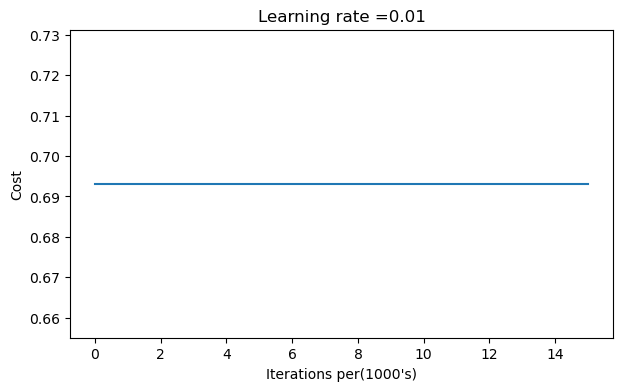

In [145]:
#zero initialization training
final_params = model(train_X, train_Y, num_iters=15000, print_cost=True, initialization="zeros")

In [136]:
#Lets see how the weights looks like
print(final_params.keys())
print(final_params["W1"])
print(final_params["W2"])
print(final_params["W3"])
print(final_params["b1"])
print(final_params["b2"])
print(final_params["b3"])

#Observe how the weights are stuck at their old weights i.e zero weights

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.6549262e-16]]


In [137]:
#Predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


    The performance is terrible, the cost doesn't decrease, and the algorithm performs no better than random guessing. Why? 
    
        Take a look at the details of the predictions and the decision boundary

In [138]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


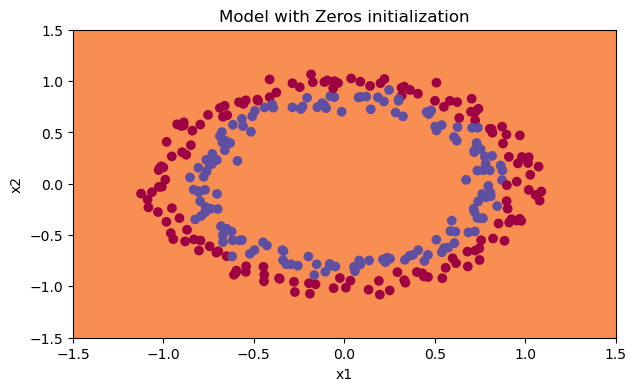

In [106]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

     Explanation calculation of symmetry breaking problem with zero intialiazations:
     
     Note: For sake of simplicity calculations below are done using only one example at a time.

    Since the weights and biases are zero, multiplying by the weights creates the zero vector which gives 0 when the activation function is ReLU. As z = 0
    
                    Relu = max(0, z) 
                        z = w. x + b = 0
                        => Relu activation = 0
      
      At the classification layer, where the activation function is sigmoid you then get (for either input):
                         σ(z) = a =  1 / (1 + e^-z) = 1 / (1 + 1) = 1/2 = y_pred = P(y=1)
                         
      As for every example you are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

    Your loss function: L(a, y) = - y ln a - (1-y) ln (1-a)
                                = - y ln y_pred - (1-y) ln (1-ypred)
    
    For y = 1, a = y_pred = 0.5, L(a, y) = -1 ln 0.5 = -1 ln 2^-1 = ln 2 = 0.693147
    For y = 0, a = y_pred = 0.5, L(a, y) = -(1-0) ln (1-0.5) = -1 ln 0.5 = -1 ln 1/2 = -1 ln 2^-1 = ln 2 = 0.693147
    
https://community.deeplearning.ai/t/symmetry-breaking-versus-zero-initialization/16061
    
    Also, the gradient will be same for both y being 0 or 1. Gradients are simply zero, You can do the math with simple one hidden layer network and you will find out that gradients are zero, if they are zero, then the updates doesnt happens for weights and the weights are stuck with their old original weights.
    
    As you can see with the prediction being 0.5 whether the actual (y) value is 1 or 0 you get the same loss value for both, so none of the weights get adjusted and you are stuck with the same old value of the weights.

    This is why you can see that the model is predicting 0 for every example! No wonder it's doing so badly.

    In general, initializing all the weights to zero results in the network failing to "break symmetry". This means that every neuron in each layer will learn the same thing, so you might as well be training a neural network with n_l = 1 for every layer. This way, the network is no more powerful than a linear classifier like logistic regression.
    
**What you should remember:**

The weights $W^{[l]}$ should be initialized randomly to break symmetry.

However, it's okay to initialize the biases $b^{[l]}$to zeros. Symmetry is still broken so long as $W^{[l]}$is initialized r andomly.

    Note: Symmetry breaking problem occurs not only when we initialize weights with zeros. It occurs also when we initialize weights value other than zero but only if we intialize them to same value. As long as W is symmetrical, then symmetric breaking problem occurs and makes the model worse

    We can also break symmetry not only by making W as random and b as zero, We can also break symmetry by making b as random and W as zero. See the above link for more info

Iteration 0, Cost: 0.693148200905787
Iteration 1000, Cost: 0.693148169469418
Iteration 2000, Cost: 0.6931481423650182
Iteration 3000, Cost: 0.693148115859262
Iteration 4000, Cost: 0.6931480899308056
Iteration 5000, Cost: 0.6931480645593647
Iteration 6000, Cost: 0.693148039725356
Iteration 7000, Cost: 0.6931480154098616
Iteration 8000, Cost: 0.6931479915946427
Iteration 9000, Cost: 0.6931479682619403
Iteration 10000, Cost: 0.6931479453947039
Iteration 11000, Cost: 0.6931479229763937
Iteration 12000, Cost: 0.693147900990998
Iteration 13000, Cost: 0.6931478794230431
Iteration 14000, Cost: 0.6931478582574362
Iteration 14999, Cost: 0.6931478375300557


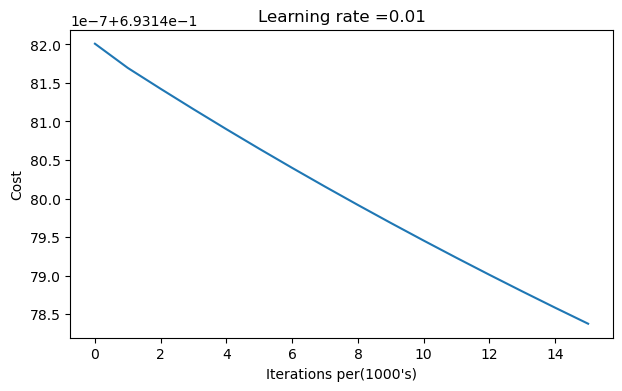

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [146]:
#Intializations w for example to 1's instead of zeros, lets use the existing function initialize_parameters_zeros but use np.ones
def initialize_parameters_zeros(layers_dims):
    L = len(layers_dims) - 1 #-1 is to remove the input layer
    params = {}
    for l in range(L):
        params["W"+str(l+1)] = np.ones((layers_dims[l+1], layers_dims[l])) * 0.01 #np.ones instead of np.zeros, scaling to avoid exploding gradients, otherwise we get inf costs and overflow issues
        params["b"+str(l+1)] = np.zeros((layers_dims[l+1], 1))
    return params

final_params = model(train_X, train_Y, num_iters=15000, print_cost=True, initialization="zeros") #no need to chnage this, it doeant matter, we are using one anyway in the function

#Predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

In [147]:
#Lets see how the weights looks like
print(final_params.keys())
print(final_params["W1"])
print(final_params["W2"])
print(final_params["W3"])
print(final_params["b1"])
print(final_params["b2"])
print(final_params["b3"])

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
[[0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]
 [0.00945789 0.00925854]]
[[0.00974856 0.00974856 0.00974856 0.00974856 0.00974856 0.00974856
  0.00974856 0.00974856 0.00974856 0.00974856]
 [0.00974856 0.00974856 0.00974856 0.00974856 0.00974856 0.00974856
  0.00974856 0.00974856 0.00974856 0.00974856]
 [0.00974856 0.00974856 0.00974856 0.00974856 0.00974856 0.00974856
  0.00974856 0.00974856 0.00974856 0.00974856]
 [0.00974856 0.00974856 0.00974856 0.00974856 0.00974856 0.00974856
  0.00974856 0.00974856 0.00974856 0.00974856]
 [0.00974856 0.00974856 0.00974856 0.00974856 0.00974856 0.00974856
  0.00974856 0.00974856 0.00974856 0.00974856]]
[[0.0070955 0.0070955 0.0070955 0.0070955 0.0070955]]
[[-1.54592058e-06]
 [-1.54592058e-06]
 [-1.54592058e-06]
 [-1.54592058e

    It turns out that what happens if you use that style of initialization is that you can learn new values of all the W[l] and b[l] parameters, but the values that you get are themselves symmetric in the sense that all the neurons output the same values at every level. That means that it’s equivalent to a network with just a single neuron. So it’s not just that there’s something bad about starting with zero values: what is bad is starting with all the same values, either zero or non-zero. It really is the case that you need to “break symmetry” by starting with values that are all different at least for the W[l] values. 

    Even if we give same intialization weights to the neurons in a layer, but different weights from layer to layer, then also you would suffer with symmetry problem.

Iteration 0, Cost: 0.6931471805599453
Iteration 1000, Cost: 0.6931471805599453
Iteration 2000, Cost: 0.6931471805599453
Iteration 3000, Cost: 0.6931471805599453
Iteration 4000, Cost: 0.6931471805599453
Iteration 5000, Cost: 0.6931471805599453
Iteration 6000, Cost: 0.6931471805599453
Iteration 7000, Cost: 0.6931471805599453
Iteration 8000, Cost: 0.6931471805599453
Iteration 9000, Cost: 0.6931471805599453
Iteration 10000, Cost: 0.6931471805599455
Iteration 11000, Cost: 0.6931471805599453
Iteration 12000, Cost: 0.6931471805599453
Iteration 13000, Cost: 0.6931471805599453
Iteration 14000, Cost: 0.6931471805599453
Iteration 14999, Cost: 0.6931471805599453


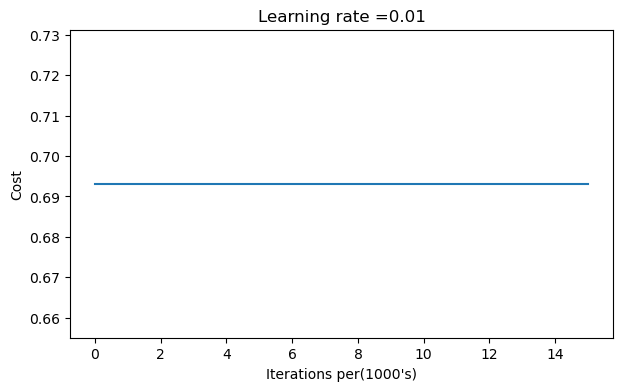

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [148]:
#Intializations w for example to 1's instead of zeros, lets use the existing function initialize_parameters_zeros but use np.ones
def initialize_parameters_zeros(layers_dims):
    L = len(layers_dims) - 1 #-1 is to remove the input layer
    params = {}
    for l in range(L):
        params["W"+str(l+1)] = np.ones((layers_dims[l+1], layers_dims[l])) * 0.01 * l #np.ones instead of np.zeros, scaling to avoid exploding gradients, otherwise we get inf costs and overflow issues
        #note we are multiplying each layer with l to get differnt W's for each layer but same W's for a layer
        params["b"+str(l+1)] = np.zeros((layers_dims[l+1], 1))
    return params

final_params = model(train_X, train_Y, num_iters=15000, print_cost=True, initialization="zeros") #no need to chnage this, it doeant matter, we are using one anyway in the function

#Predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

In [149]:
#Lets see how the weights looks like
print(final_params.keys())
print(final_params["W1"])
print(final_params["W2"])
print(final_params["W3"])
print(final_params["b1"])
print(final_params["b2"])
print(final_params["b3"])

#We can see that symmetry at each layer is preserved. Meaning each layer has neurons outputting same value. 
#We might as well change it to single neuron per layer insted of many neurons in a layer as many neurons anyway outputs same.

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]
[[0.02 0.02 0.02 0.02 0.02]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.6549262e-16]]


### 5 - Random Initialization
    To break symmetry, initialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you'll see what happens when the weights are initialized randomly, but to very large values.


#### Exercise 2 - initialize_parameters_random
     Implement the following function to initialize your weights to large random values (scaled by *10) and your biases to zeros. Use np.random.randn(..,..) * 10 for weights and np.zeros((.., ..)) for biases. You're using a fixed np.random.seed(..) to make sure your "random" weights match ours, so don't worry if running your code several times always gives you the same initial values for the parameters.

In [228]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    L = len(layers_dims)
    params = {}
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))
    return params

In [155]:
#test the function initialize_parameters_random
layers_dims = [2, 3, 1]
params = initialize_parameters_random(layers_dims)
print(params.keys())
print(params["W1"].shape)
print(params["W2"].shape)
print(params["b1"].shape)
print(params["b2"].shape)


print("W1 \n" + str(params["W1"]))
print("\nW2\n" + str(params["W2"]))

dict_keys(['W1', 'b1', 'W2', 'b2'])
(3, 2)
(1, 3)
(3, 1)
(1, 1)
W1 
[[ 17.88628473   4.36509851]
 [  0.96497468 -18.63492703]
 [ -2.77388203  -3.54758979]]

W2
[[-0.82741481 -6.27000677 -0.43818169]]


    Run the following code to train your model on 15,000 iterations using random initialization.

C:\Users\malla\AppData\Local\Temp\ipykernel_3028\3260163867.py:68: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\malla\AppData\Local\Temp\ipykernel_3028\3260163867.py:68: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Iteration 0, Cost: inf
Iteration 1000, Cost: 0.6239567039908781
Iteration 2000, Cost: 0.5978043872838292
Iteration 3000, Cost: 0.563595830364618
Iteration 4000, Cost: 0.5500816882570866
Iteration 5000, Cost: 0.5443417928662615
Iteration 6000, Cost: 0.5373553777823036
Iteration 7000, Cost: 0.4700141958024487
Iteration 8000, Cost: 0.3976617665785177
Iteration 9000, Cost: 0.39344405717719166
Iteration 10000, Cost: 0.39201765232720626
Iteration 11000, Cost: 0.38910685278803786
Iteration 12000, Cost: 0.38612995897697244
Iteration 13000, Cost: 0.3849735792031832
Iteration 14000, Cost: 0.38275100578285265
Iteration 14999, Cost: 0.3810493666603578


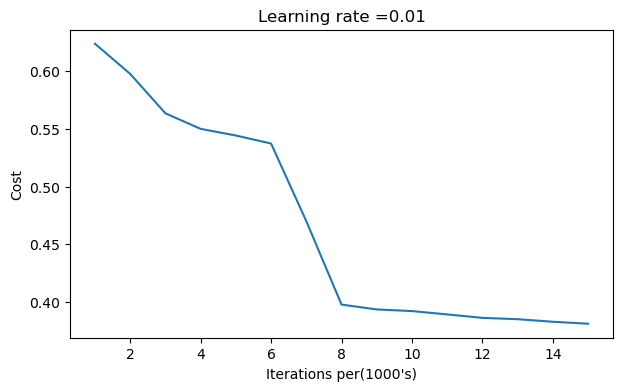

In [163]:
final_params = model(train_X, train_Y, num_iters=15000, initialization="random", print_cost=True)

    If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff. A more numerically sophisticated implementation would fix this, but for the purposes of this notebook, it isn't really worth worrying about.

    In any case, you've now broken the symmetry, and this gives noticeably better accuracy than before. The model is no longer outputting all 0s. Progress!

In [164]:
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [165]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


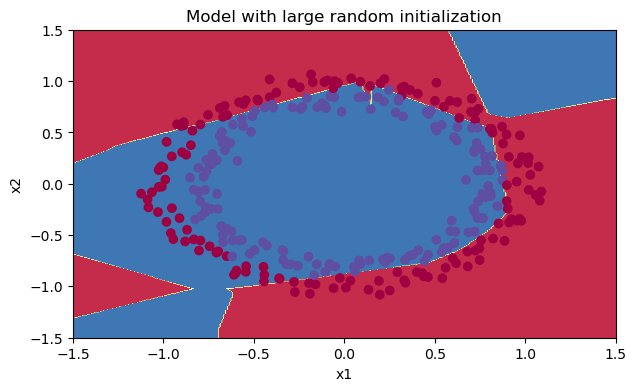

In [172]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

#### Observations:

    The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples(1/1+e^-verylargeactivation), and when it gets that example wrong it incurs a very high loss for that example. Indeed, when log(a[3]) = log(0), the loss goes to infinity.
    
    Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
    If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

C:\Users\malla\AppData\Local\Temp\ipykernel_3028\2972480496.py:68: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\malla\AppData\Local\Temp\ipykernel_3028\2972480496.py:68: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Iteration 0, Cost: inf
Iteration 1000, Cost: 0.6239567039908781
Iteration 2000, Cost: 0.5978043872838292
Iteration 3000, Cost: 0.563595830364618
Iteration 4000, Cost: 0.5500816882570866
Iteration 5000, Cost: 0.5443417928662615
Iteration 6000, Cost: 0.5373553777823036
Iteration 7000, Cost: 0.4700141958024487
Iteration 8000, Cost: 0.3976617665785177
Iteration 9000, Cost: 0.39344405717719166
Iteration 10000, Cost: 0.39201765232720626
Iteration 11000, Cost: 0.38910685278803786
Iteration 12000, Cost: 0.38612995897697244
Iteration 13000, Cost: 0.3849735792031832
Iteration 14000, Cost: 0.38275100578285265
Iteration 15000, Cost: 0.3810479259426334
Iteration 16000, Cost: 0.3799469015541271
Iteration 17000, Cost: 0.37912820768311145
Iteration 18000, Cost: 0.37444689934597764
Iteration 19000, Cost: 0.3716142538936356
Iteration 20000, Cost: 0.3696379905630941
Iteration 21000, Cost: 0.3630078840634142
Iteration 22000, Cost: 0.35772819004155526
Iteration 23000, Cost: 0.35535253534731837
Iteration 24

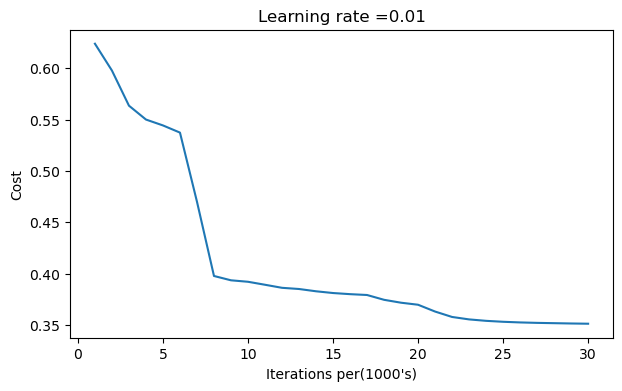

On the train set:
Accuracy: 0.85
On the test set:
Accuracy: 0.84


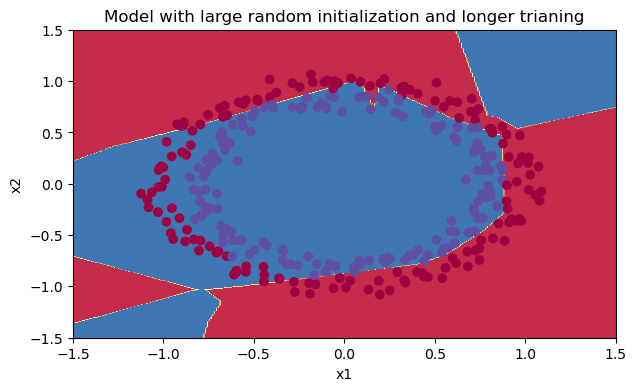

In [181]:
final_params = model(train_X, train_Y, learning_rate=0.01, num_iters=30000, initialization="random", print_cost=True)
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)
plt.title("Model with large random initialization and longer trianing")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

#still slower. Increasing learning making it overshooting the minimum. Reuducing lr making it learnig very slowly

Iteration 0, Cost: 0.6931473549048267
Iteration 1000, Cost: 0.6931473504885134
Iteration 2000, Cost: 0.6931473468317759
Iteration 3000, Cost: 0.6931473432446151
Iteration 4000, Cost: 0.6931473396813665
Iteration 5000, Cost: 0.6931473361903396
Iteration 6000, Cost: 0.6931473327310922
Iteration 7000, Cost: 0.6931473293491259
Iteration 8000, Cost: 0.6931473260187053
Iteration 9000, Cost: 0.6931473227372426
Iteration 10000, Cost: 0.6931473195009528
Iteration 11000, Cost: 0.6931473163278133
Iteration 12000, Cost: 0.693147312959552
Iteration 13000, Cost: 0.6931473097541097
Iteration 14000, Cost: 0.6931473065831708
Iteration 15000, Cost: 0.6931473033837475
Iteration 16000, Cost: 0.6931473000317377
Iteration 17000, Cost: 0.6931472968386463
Iteration 18000, Cost: 0.6931472936773996
Iteration 19000, Cost: 0.6931472905478622
Iteration 20000, Cost: 0.6931472874374492
Iteration 21000, Cost: 0.6931472842356727
Iteration 22000, Cost: 0.6931472810422217
Iteration 23000, Cost: 0.693147277889029
Iterati

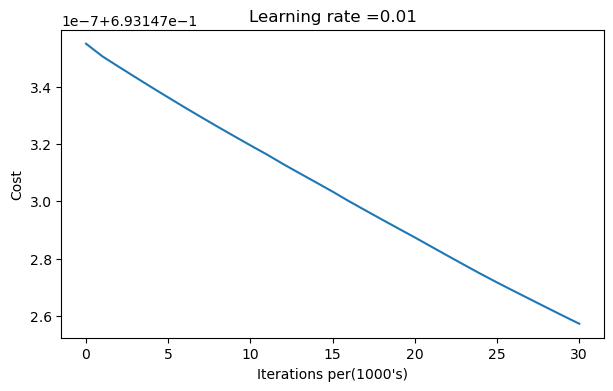

On the train set:
Accuracy: 0.48333333333333334
On the test set:
Accuracy: 0.46


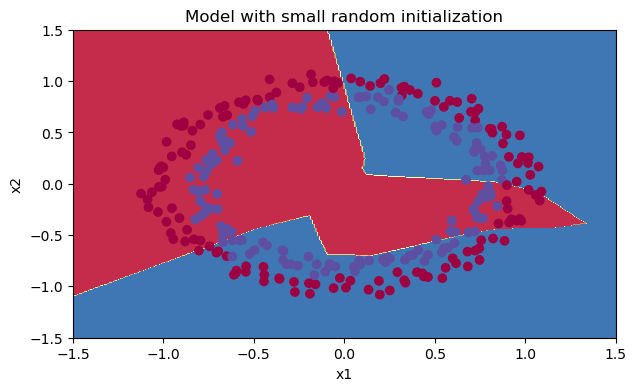

In [213]:
#Random initialization with small scaling value
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    L = len(layers_dims)
    params = {}
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01 #(to make sure each layer has different scale)
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))
    return params

final_params = model(train_X, train_Y, learning_rate=0.01, num_iters=30000, initialization="random", print_cost=True)
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)
plt.title("Model with small random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

    Very bad performance!

    In summary:

        Initializing weights to very large random values doesn't work well.
        Initializing with small random values should do better. The important question is, how small should be these random values be? Let's find out up next!
        
    Optional Read:
    -------------

    The main difference between Gaussian variable (numpy.random.randn()) and uniform random variable is the distribution of the generated random numbers:

        numpy.random.rand() produces numbers in a uniform distribution.
        numpy.random.randn() produces numbers in a normal distribution.
        
    When used for weight initialization, randn() helps most the weights to avoid being close to the extremes, allocating most of them in the center of the range.

    An intuitive way to see it is, for example, if you take the sigmoid() activation function.

        You’ll remember that the slope near 0 or near 1 is extremely small, so the weights near those extremes will converge much more slowly to the solution, and having most of them near the center will speed the convergence.

In [194]:
#Random intialiazation of b's instead of W.
#Making b random and W as 0. This would also break symmetry. see
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    L = len(layers_dims)
    params = {}
    for l in range(1, L):
        params[f"W{l}"] = np.zeros((layers_dims[l], layers_dims[l-1])) #zeros
        params[f"b{l}"] = np.random.randn(layers_dims[l], 1) * 10 #intializing b to random numbers scaled by 10
    return params

Iteration 0, Cost: 2.040714745442227
Iteration 1000, Cost: 0.6931471803712667
Iteration 2000, Cost: 0.6931471801821576
Iteration 3000, Cost: 0.6931471799930105
Iteration 4000, Cost: 0.6931471798038054
Iteration 5000, Cost: 0.6931471796145225
Iteration 6000, Cost: 0.6931471794251424
Iteration 7000, Cost: 0.6931471792356451
Iteration 8000, Cost: 0.6931471790460112
Iteration 9000, Cost: 0.6931471788562207
Iteration 10000, Cost: 0.6931471786662541
Iteration 11000, Cost: 0.6931471784760915
Iteration 12000, Cost: 0.6931471782857132
Iteration 13000, Cost: 0.6931471780950993
Iteration 14000, Cost: 0.69314717790423
Iteration 15000, Cost: 0.6931471777130855
Iteration 16000, Cost: 0.6931471775216461
Iteration 17000, Cost: 0.6931471773298916
Iteration 18000, Cost: 0.6931471771378022
Iteration 19000, Cost: 0.693147176945358
Iteration 20000, Cost: 0.6931471767525388
Iteration 21000, Cost: 0.6931471765593249
Iteration 22000, Cost: 0.6931471763656959
Iteration 23000, Cost: 0.6931471761716317
Iteration

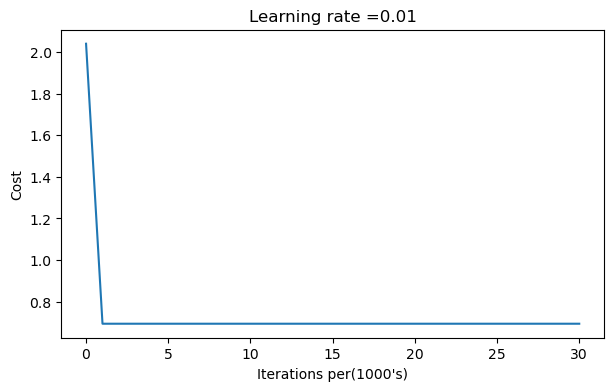

On the train set:
Accuracy: 0.49333333333333335
On the test set:
Accuracy: 0.51


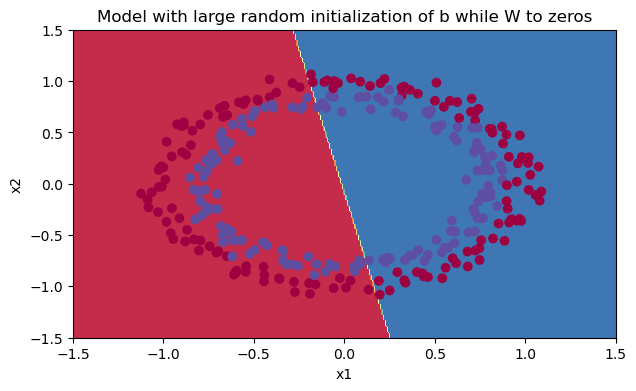

In [195]:
final_params = model(train_X, train_Y, learning_rate=0.01, num_iters=30000, initialization="random", print_cost=True)
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)
plt.title("Model with large random initialization of b while W to zeros")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

#we are atleast breaking the symmetry as the cost is reducing but it is slower i..e the optimization is slower. MAy be we can run it for longer duration

Iteration 0, Cost: 2.040714745442227
Iteration 1000, Cost: 0.6931471803712667
Iteration 2000, Cost: 0.6931471801821576
Iteration 3000, Cost: 0.6931471799930105
Iteration 4000, Cost: 0.6931471798038054
Iteration 5000, Cost: 0.6931471796145225
Iteration 6000, Cost: 0.6931471794251424
Iteration 7000, Cost: 0.6931471792356451
Iteration 8000, Cost: 0.6931471790460112
Iteration 9000, Cost: 0.6931471788562207
Iteration 10000, Cost: 0.6931471786662541
Iteration 11000, Cost: 0.6931471784760915
Iteration 12000, Cost: 0.6931471782857132
Iteration 13000, Cost: 0.6931471780950993
Iteration 14000, Cost: 0.69314717790423
Iteration 15000, Cost: 0.6931471777130855
Iteration 16000, Cost: 0.6931471775216461
Iteration 17000, Cost: 0.6931471773298916
Iteration 18000, Cost: 0.6931471771378022
Iteration 19000, Cost: 0.693147176945358
Iteration 20000, Cost: 0.6931471767525388
Iteration 21000, Cost: 0.6931471765593249
Iteration 22000, Cost: 0.6931471763656959
Iteration 23000, Cost: 0.6931471761716317
Iteration

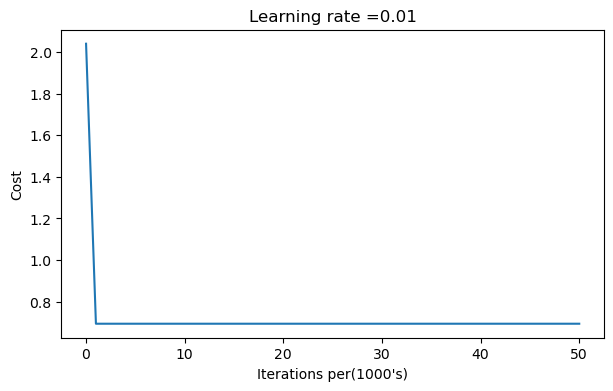

On the train set:
Accuracy: 0.49333333333333335
On the test set:
Accuracy: 0.51


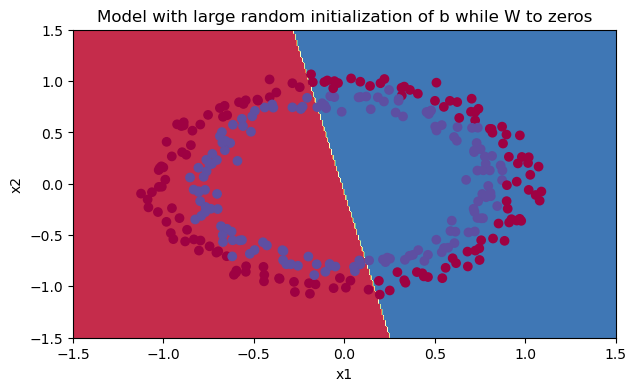

In [191]:
#Lets run it longer
final_params = model(train_X, train_Y, learning_rate=0.01, num_iters=50000, initialization="random", print_cost=True)
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)
plt.title("Model with large random initialization of b while W to zeros")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)
#very slower to optimize

### 6 - He Initialization
    Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights W[l] of sqrt(1./layers_dims[l-1]) where He initialization would use sqrt(2./layers_dims[l-1]).)


#### Exercise 3 - initialize_parameters_he
    Implement the following function to initialize your parameters with He initialization. This function is similar to the previous initialize_parameters_random(...). The only difference is that instead of multiplying np.random.randn(..,..) by 10, you will multiply it by sqrt(2/dimension of the previous layer), which is what He initialization recommends for layers with a ReLU activation.

In [230]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    params = {}
    L = len(layers_dims) - 1
    for l in range(1, L+1):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))
    return params

In [206]:
#test the function
parameters = initialize_parameters_he([2, 4, 1])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Iteration 0, Cost: 0.8830537463419761
Iteration 1000, Cost: 0.6879825919728063
Iteration 2000, Cost: 0.6751286264523371
Iteration 3000, Cost: 0.6526117768893807
Iteration 4000, Cost: 0.6082958970572938
Iteration 5000, Cost: 0.5304944491717495
Iteration 6000, Cost: 0.4138645817071794
Iteration 7000, Cost: 0.3117803464844441
Iteration 8000, Cost: 0.23696215330322562
Iteration 9000, Cost: 0.18597287209206836
Iteration 10000, Cost: 0.15015556280371817
Iteration 11000, Cost: 0.12325079292273552
Iteration 12000, Cost: 0.09917746546525932
Iteration 13000, Cost: 0.08457055954024274
Iteration 14000, Cost: 0.07357895962677362
Iteration 14999, Cost: 0.06481868466579113


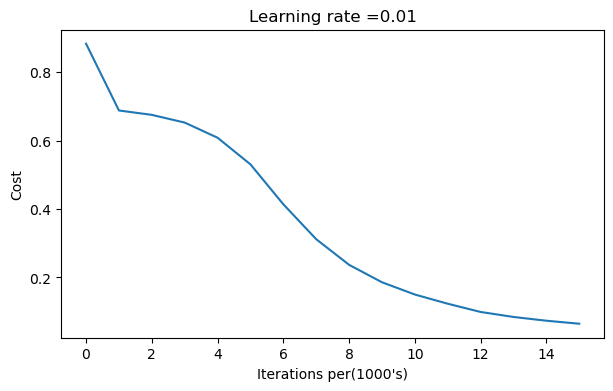

In [207]:
#Training#Lets run it longer
final_params = model(train_X, train_Y, learning_rate=0.01, num_iters=15000, initialization="He", print_cost=True)

In [208]:
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


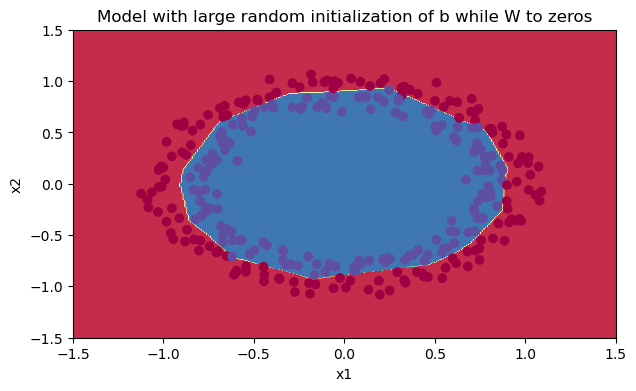

In [209]:
plt.title("Model with large random initialization of b while W to zeros")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

Iteration 0, Cost: 0.7013131193486029
Iteration 1000, Cost: 0.6931471779879762
Iteration 2000, Cost: 0.6931471753056458
Iteration 3000, Cost: 0.6931471725993191
Iteration 4000, Cost: 0.6931471698565448
Iteration 5000, Cost: 0.6931471670647127
Iteration 6000, Cost: 0.6931471642109976
Iteration 7000, Cost: 0.693147161282302
Iteration 8000, Cost: 0.693147158265198
Iteration 9000, Cost: 0.693147155145867
Iteration 10000, Cost: 0.6931471519100398
Iteration 11000, Cost: 0.6931471485429322
Iteration 12000, Cost: 0.6931471450291807
Iteration 13000, Cost: 0.6931471413527733
Iteration 14000, Cost: 0.6931471374969801
Iteration 15000, Cost: 0.6931471334442793
Iteration 16000, Cost: 0.6931471291762794
Iteration 17000, Cost: 0.6931471246736398
Iteration 18000, Cost: 0.6931471199159844
Iteration 19000, Cost: 0.693147114881812
Iteration 20000, Cost: 0.693147109548403
Iteration 21000, Cost: 0.6931471038917186
Iteration 22000, Cost: 0.6931470978862952
Iteration 23000, Cost: 0.6931470915051327
Iteration 

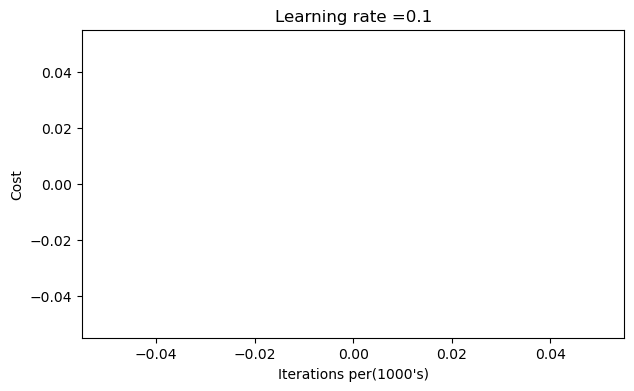

On the train set:
Accuracy: 0.5033333333333333
On the test set:
Accuracy: 0.5


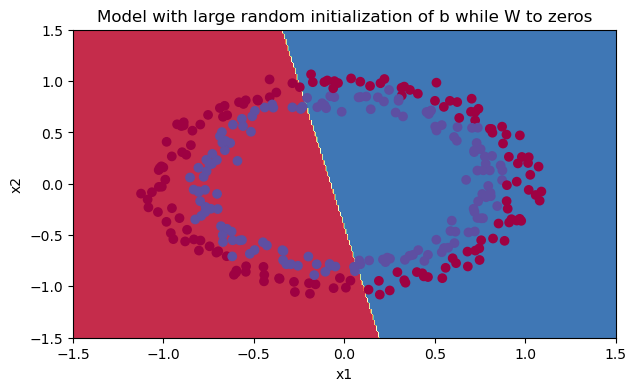

In [217]:
#Just testing He initialization for b instead of W
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims) - 1
    for l in range(1, L+1):
        params[f"W{l}"] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params[f"b{l}"] = np.random.randn(layers_dims[l], 1)  * np.sqrt(2 / layers_dims[l-1])
    return params

final_params = model(train_X, train_Y, learning_rate=0.1, num_iters=50000, initialization="He")
#predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params)

plt.title("Model with large random initialization of b while W to zeros")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(final_params, x.T), train_X, train_Y)

#Broke the symmetry as W and b for each neuron will be diffferent but very slow optimization, We can print the params and observe

#### Observations:

    The model with He initialization separates the blue and the red dots very well in a small number of iterations.

#### 7 - Conclusions
    You've tried three different types of initializations. For the same number of iterations and same hyperparameters, the comparison is:

                    Model	                                  Train accuracy	         Problem/Comment
                    3-layer NN with zeros initialization	    50%	                     fails to break symmetry
                    3-layer NN with large random initialization	83%	                     too large weights
                    3-layer NN with He initialization	        99%	                     recommended method
                    
                    
    Congratulations! You've completed this notebook on Initialization.

    Here's a quick recap of the main takeaways:

        Different initializations lead to very different results
        Random initialization is used to break symmetry and make sure different hidden units can learn different things
        Resist initializing to values that are too large!
        He initialization works well for networks with ReLU activations

In [219]:
#Testcases
def datatype_check(expected_output, target_output, error):
    success = 0
    if isinstance(target_output, dict):
        for key in expected_output.keys():
            try:
                success += datatype_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} in variable {}. Got {} but expected type {}".format(error,
                                                                          key, type(target_output[key]), type(expected_output[key])))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(target_output, tuple) or isinstance(target_output, list):
        for i in range(len(expected_output)):
            try: 
                success += datatype_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} in variable {}. Got type: {}  but expected type {}".format(error,
                                                                          i, type(target_output[i]), type(expected_output[i])))
        if success == len(target_output):
            return 1
        else:
            return 0
                
    else:
        assert isinstance(target_output, type(expected_output))
        return 1
            
def equation_output_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += equation_output_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error,
                                                                          key))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try: 
                success += equation_output_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(target_output):
            return 1
        else:
            return 0
                
    else:
        if hasattr(expected_output, 'shape'):
            #np.allclose(target_output, expected_output)
            np.testing.assert_array_almost_equal(target_output, expected_output)
        else:
            assert target_output == expected_output
        return 1
    
def shape_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += shape_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error, key))
        if success == len(expected_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try: 
                success += shape_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(expected_output):
            return 1
        else:
            return 0
                
    else:
        if hasattr(expected_output, 'shape'):
            assert target_output.shape == expected_output.shape
        return 1

def single_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            if test_case['name'] == "datatype_check":
                assert isinstance(target(*test_case['input']),
                                  type(test_case["expected"]))
                success += 1
            if test_case['name'] == "equation_output_check":
                assert np.allclose(test_case["expected"],
                                   target(*test_case['input']))
                success += 1
            if test_case['name'] == "shape_check":
                assert test_case['expected'].shape == target(*test_case['input']).shape
                success += 1
        except:
            print("Error: " + test_case['error'])
            
    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))

def multiple_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            target_answer = target(*test_case['input'])                   
            if test_case['name'] == "datatype_check":
                success += datatype_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "equation_output_check":
                success += equation_output_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "shape_check":
                success += shape_check(test_case['expected'], target_answer, test_case['error'])
        except:
            print("Error: " + test_case['error'])
            
    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))

In [227]:
#Unit Tests
def initialize_parameters_zeros_test(target):
    layer_dims = [3, 2, 1]
    expected_output = {'W1': np.array([[0., 0., 0.],
        [0., 0., 0.]]),
 'b1': np.array([[0.],
        [0.]]),
 'W2': np.array([[0., 0.]]),
 'b2': np.array([[0.]])}
    
    test_cases = [
        {
            "name":"datatype_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error":"Datatype mismatch"
        },
        {
            "name": "shape_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)

initialize_parameters_zeros_test(initialize_parameters_zeros)

 All tests passed.


In [229]:
def initialize_parameters_random_test(target):
    layer_dims = [3,2,1]
    expected_output = {'W1': np.array([[ 17.88628473,   4.36509851,   0.96497468],
        [-18.63492703,  -2.77388203,  -3.54758979]]),
 'b1': np.array([[0.],
        [0.]]),
 'W2': np.array([[-0.82741481, -6.27000677]]),
 'b2': np.array([[0.]])}
    
    test_cases = [
        {
            "name":"datatype_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error":"Datatype mismatch"
        },
        {
            "name": "shape_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)
    
initialize_parameters_random_test(initialize_parameters_random)

 All tests passed.


In [231]:
def initialize_parameters_he_test(target):
    
    layer_dims = [3, 1, 2]
    expected_output = {'W1': np.array([[1.46040903, 0.3564088 , 0.07878985]]), 
                       'b1': np.array([[0.]]), 
                       'W2': np.array([[-2.63537665], [-0.39228616]]), 
                       'b2': np.array([[0.],[0.]])}
    
    
    test_cases = [
        {
            "name":"datatype_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error":"Datatype mismatch"
        },
        {
            "name": "shape_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)
    
initialize_parameters_he_test(initialize_parameters_he)

 All tests passed.


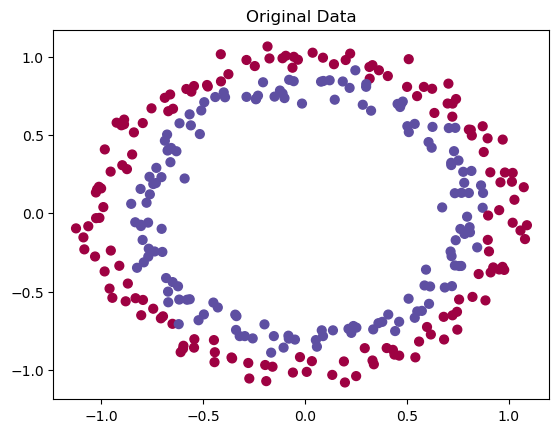

In [65]:
#Self practice
#Weight Initializations
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import scipy

def predict(X, Y, params):
    AL, _ = forward_prop(X, params)
    preds = (AL > 0.5).astype("int")
    print(f"Accuracy: "+ str(np.mean(preds[0, :]==Y[0, :])))
    return preds

def predict_dec(X, params):
    AL, _ = forward_prop(X, params)
    preds = (AL > 0.5).astype("int")
    return preds

def plot_decision_boundary(model, X, Y):
    X_min, X_max = X[0, :].min() - 1.0, X[0, :].max() + 1.0
    Y_min, Y_max = X[1, :].min() - 1.0, X[1, :].max() + 1.0
    h = 0.01
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral, s=40)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.title("Decision Boundary")
    plt.show()

def relu_derivative(Z):
    g_d = np.where(Z>0, 1, 0)
    return g_d

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def relu(Z):
    A = np.where(Z<=0, 0, Z)
    #Z[Z<=0] = 0
    return A

def optimize_params(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(L):
        params[f"W{l+1}"] = params[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"]
        params[f"b{l+1}"] = params[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"]
    return params

def backward_prop(X, A3, Y, cache):
    W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3 = cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)  
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads

def compute_cost(AL, Y):
    m = Y.shape[1]
    loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
    cost = (- 1 / m) * np.nansum(loss)
    cost = np.squeeze(cost)
    return cost

def forward_prop(X, params):
    W1, b1, W2, b2, W3, b3 = params.values()
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3)
    
    return A3, cache

def initialize_weights_He(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))        
    return params

def initialize_bias_He(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params[f"b{l}"] = np.random.randn(layers_dims[l], 1) * np.sqrt(2 / layers_dims[l-1])
    return params

def initiliaze_weights_Xavier(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1 / layers_dims[l-1])
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))   
    return params

def initiliaze_weights_zeros(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))   
    return params

def initiliaze_weights_similar_ones(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.ones((layers_dims[l], layers_dims[l-1])) #similiarly with ones
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))
    return params

def initiliaze_weights_similar_layers(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.ones((layers_dims[l], layers_dims[l-1])) * l #similiar for a layer but different for each layer
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))
    return params

def initialize_weights_random_small(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))   
    return params

def initialize_weights_random_large(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))   
    return params

def nn_model(X, Y, learning_rate=0.01, num_iters=15000, print_cost=False, initialize="He"):
    #3 layer network
    layers_dims = [X.shape[0], 10, 5, 1]
    costs = []
    
    if initialize == "random_small":
        params = initialize_weights_random_small(layers_dims)
    elif initialize == "random_large":
        params = initialize_weights_random_large(layers_dims)
    elif initialize == "xavier":
        params = initiliaze_weights_Xavier(layers_dims)
    elif initialize == "zeros":
        params = initiliaze_weights_zeros(layers_dims)
    elif initialize == "ones":
        params = initiliaze_weights_similar_ones(layers_dims)
    elif initialize == "similar_layers":
        params = initiliaze_weights_similar_layers(layers_dims)
    elif initialize == "initialize_bias_He":
        params = initialize_bias_He(layers_dims)
    elif initialize == "He":
        params = initialize_weights_He(layers_dims)
        
    for i in range(num_iters):
        A3, cache = forward_prop(X, params)
        cost = compute_cost(A3, Y)
        grads = backward_prop(X, A3, Y, cache)
        params = optimize_params(params, grads, learning_rate)
        
        if i%1000 == 0 or i == num_iters - 1:
            costs.append(cost)
        
            if print_cost:
                print("Iteration: " +str(i)+ ", Cost: " +str(cost))
    plt.plot(costs)
    plt.xlabel("Iterations(per 1000's)")
    plt.ylabel("Costs")
    plt.title("Learning curve with initialization type: "+initialize)
    plt.show()
    return params

def load_data():
    np.random.seed(1)
    train_X, train_Y = datasets.make_circles(300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = datasets.make_circles(100, noise=.05)
    train_X = train_X.T
    train_Y = train_Y.reshape(1, -1)
    test_X = test_X.T
    test_Y = test_Y.reshape(1, -1)
    return train_X, test_X, train_Y, test_Y

train_X, test_X, train_Y, test_Y = load_data()
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, cmap=plt.cm.Spectral, s=40)
plt.title("Original Data")
plt.show()

Iteration: 0, Cost: 0.8830537463419761
Iteration: 1000, Cost: 0.6879825919728063
Iteration: 2000, Cost: 0.6751286264523371
Iteration: 3000, Cost: 0.6526117768893807
Iteration: 4000, Cost: 0.6082958970572937
Iteration: 5000, Cost: 0.5304944491717495
Iteration: 6000, Cost: 0.4138645817071795
Iteration: 7000, Cost: 0.31178034648444414
Iteration: 8000, Cost: 0.23696215330322562
Iteration: 9000, Cost: 0.18597287209206834
Iteration: 10000, Cost: 0.15015556280371814
Iteration: 11000, Cost: 0.12325079292273551
Iteration: 12000, Cost: 0.09917746546525937
Iteration: 13000, Cost: 0.08457055954024278
Iteration: 14000, Cost: 0.07357895962677369
Iteration: 14999, Cost: 0.06481868466579116


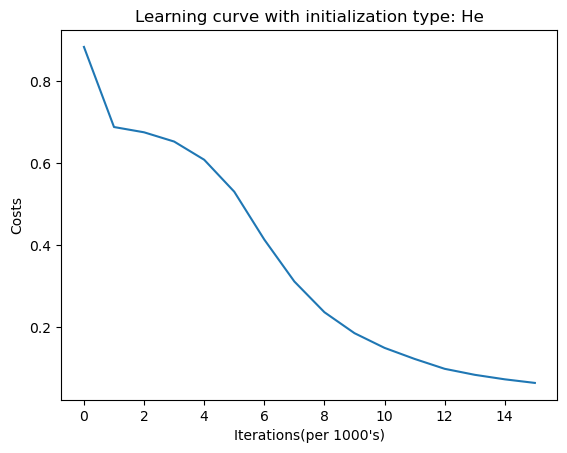

On Train set
Accuracy: 0.9933333333333333
On Test set
Accuracy: 0.96


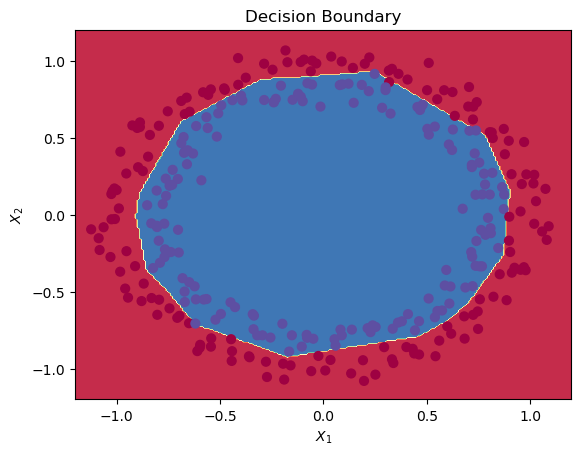

In [47]:
#Training with He initialization
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="He")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.20, 1.20])
axes.set_ylim([-1.20, 1.20])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.729451703805014
Iteration: 1000, Cost: 0.6939441869897982
Iteration: 2000, Cost: 0.686361215705118
Iteration: 3000, Cost: 0.6783983102177117
Iteration: 4000, Cost: 0.6642724691723297
Iteration: 5000, Cost: 0.6361798618357726
Iteration: 6000, Cost: 0.5845947883351541
Iteration: 7000, Cost: 0.4968293476934554
Iteration: 8000, Cost: 0.3892480115718083
Iteration: 9000, Cost: 0.2944433152121502
Iteration: 10000, Cost: 0.2286133640197962
Iteration: 11000, Cost: 0.18314787866387175
Iteration: 12000, Cost: 0.150080097183777
Iteration: 13000, Cost: 0.1267612749373751
Iteration: 14000, Cost: 0.10850689140892145
Iteration: 14999, Cost: 0.09422714762667525


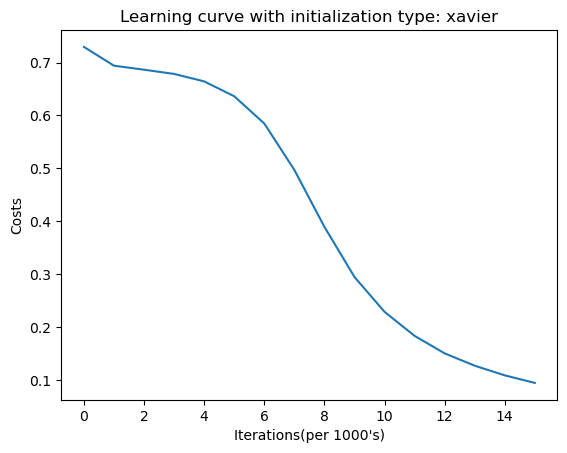

On Train set
Accuracy: 0.99
On Test set
Accuracy: 0.93


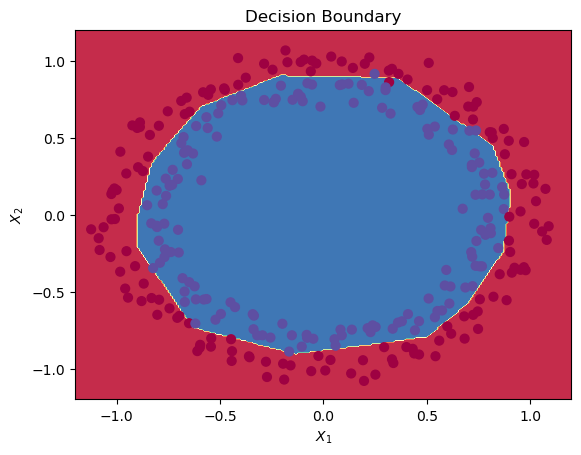

In [50]:
#Training with Xavier initialization
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="xavier")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.20, 1.20])
axes.set_ylim([-1.20, 1.20])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6931473549048267
Iteration: 1000, Cost: 0.6931473504885134
Iteration: 2000, Cost: 0.6931473468317759
Iteration: 3000, Cost: 0.6931473432446151
Iteration: 4000, Cost: 0.6931473396813665
Iteration: 5000, Cost: 0.6931473361903396
Iteration: 6000, Cost: 0.6931473327310922
Iteration: 7000, Cost: 0.6931473293491259
Iteration: 8000, Cost: 0.6931473260187053
Iteration: 9000, Cost: 0.6931473227372426
Iteration: 10000, Cost: 0.6931473195009528
Iteration: 11000, Cost: 0.6931473163278133
Iteration: 12000, Cost: 0.693147312959552
Iteration: 13000, Cost: 0.6931473097541097
Iteration: 14000, Cost: 0.6931473065831708
Iteration: 14999, Cost: 0.6931473033868656


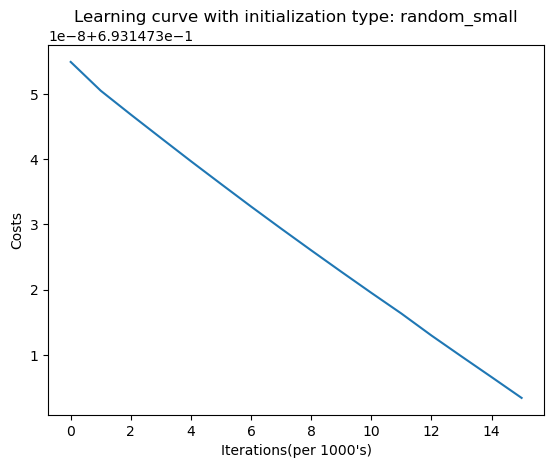

On Train set
Accuracy: 0.4633333333333333
On Test set
Accuracy: 0.48


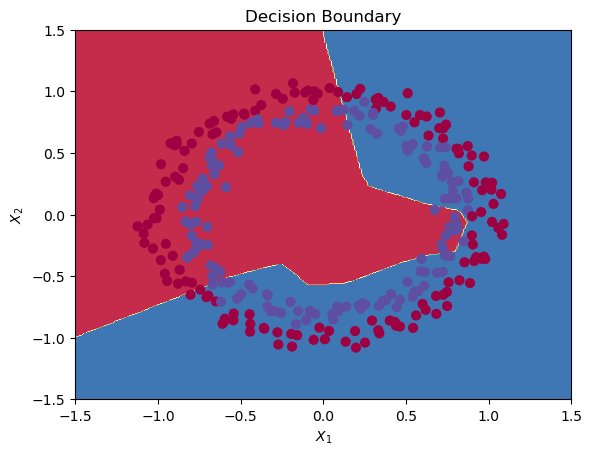

In [54]:
#Training with random initiliazation of small magnitude - suffers vanishing gradient, stops training early
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="random_small")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 0, Cost: nan
Iteration: 1000, Cost: 0.6242728669110709
Iteration: 2000, Cost: 0.5978944243285775
Iteration: 3000, Cost: 0.5636283208746774
Iteration: 4000, Cost: 0.5501079827454924
Iteration: 5000, Cost: 0.5443679478780186
Iteration: 6000, Cost: 0.5373801856445676
Iteration: 7000, Cost: 0.4710139367321082
Iteration: 8000, Cost: 0.397702207040245
Iteration: 9000, Cost: 0.3934510515058079
Iteration: 10000, Cost: 0.39201975713520953
Iteration: 11000, Cost: 0.3891261332956921
Iteration: 12000, Cost: 0.3861303487755314
Iteration: 13000, Cost: 0.3849727255817478
Iteration: 14000, Cost: 0.38275614254174445
Iteration: 14999, Cost: 0.3810583202244202


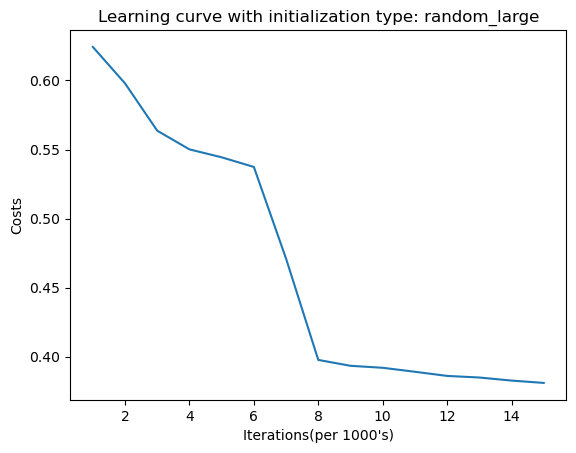

On Train set
Accuracy: 0.83
On Test set
Accuracy: 0.86


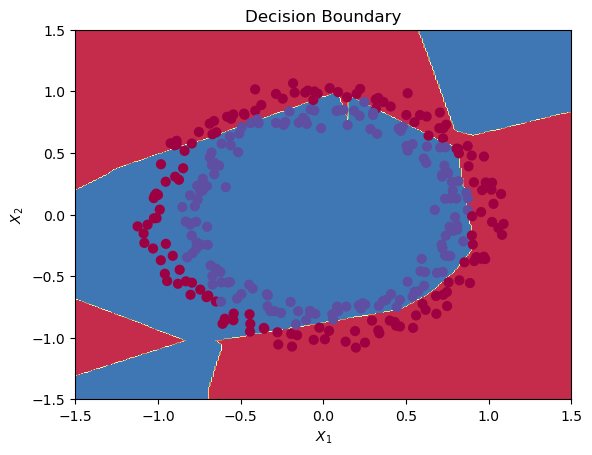

In [55]:
#Training with random initiliazation of large magnitude
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="random_large")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6931471805599453
Iteration: 1000, Cost: 0.6931471805599453
Iteration: 2000, Cost: 0.6931471805599453
Iteration: 3000, Cost: 0.6931471805599453
Iteration: 4000, Cost: 0.6931471805599453
Iteration: 5000, Cost: 0.6931471805599453
Iteration: 6000, Cost: 0.6931471805599453
Iteration: 7000, Cost: 0.6931471805599453
Iteration: 8000, Cost: 0.6931471805599453
Iteration: 9000, Cost: 0.6931471805599453
Iteration: 10000, Cost: 0.6931471805599453
Iteration: 11000, Cost: 0.6931471805599453
Iteration: 12000, Cost: 0.6931471805599453
Iteration: 13000, Cost: 0.6931471805599453
Iteration: 14000, Cost: 0.6931471805599453
Iteration: 14999, Cost: 0.6931471805599453


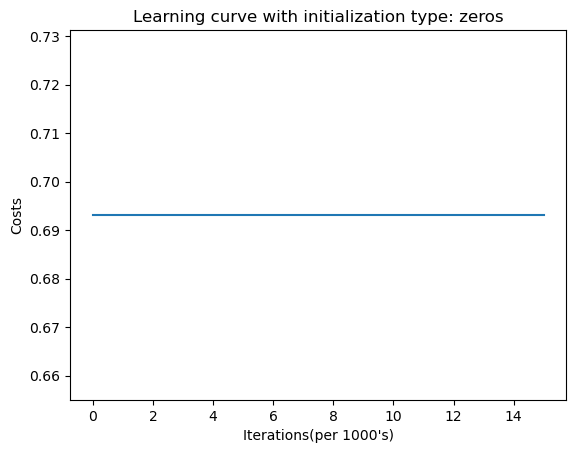

On Train set
Accuracy: 0.5
On Test set
Accuracy: 0.5


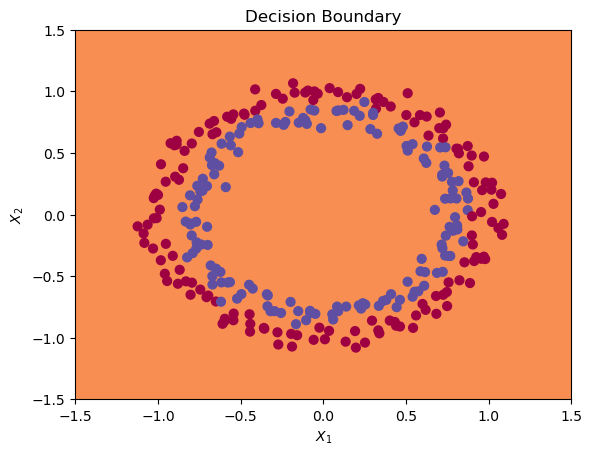

In [56]:
#Training with zeros intialization - symmetry breaking problem
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="zeros")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 0, Cost: nan
Iteration: 1000, Cost: 0.685658869855508
Iteration: 2000, Cost: 0.6847939783535478
Iteration: 3000, Cost: 0.6842563742765553
Iteration: 4000, Cost: 0.6837564210925575
Iteration: 5000, Cost: 0.6831632413399638
Iteration: 6000, Cost: 0.6822882659912485
Iteration: 7000, Cost: 0.6811154261256691
Iteration: 8000, Cost: 0.6794735577368092
Iteration: 9000, Cost: 0.677046329204108
Iteration: 10000, Cost: 0.673597896019989
Iteration: 11000, Cost: 0.661311666832675
Iteration: 12000, Cost: 0.6507248363606518
Iteration: 13000, Cost: 0.6465899554771695
Iteration: 14000, Cost: 0.6451610099124095
Iteration: 14999, Cost: 0.6445800748090428


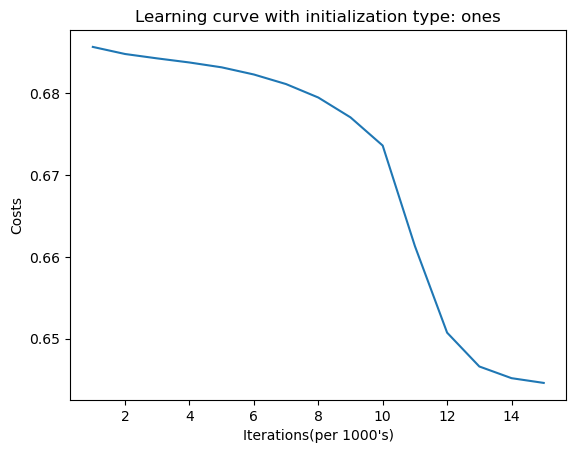

On Train set
Accuracy: 0.5866666666666667
On Test set
Accuracy: 0.59


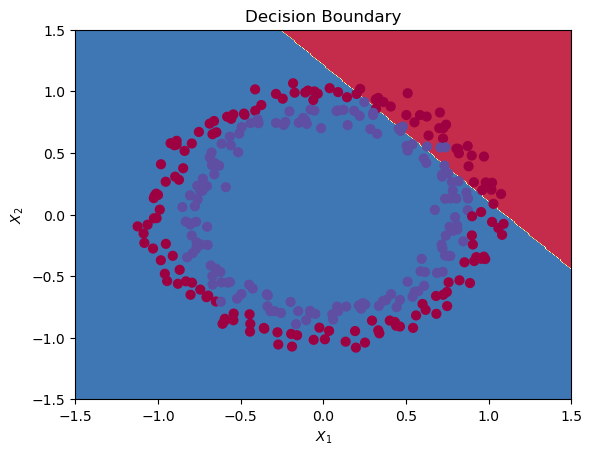

In [57]:
#Training with ones intialization - symmetry breaking problem - all layers behave similarly, we can check the gradients or actiavtion of the layers
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="ones")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_13600\572720955.py:76: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 0, Cost: nan
Iteration: 1000, Cost: 0.6931477813976715
Iteration: 2000, Cost: 0.6931471845830948
Iteration: 3000, Cost: 0.6931471805868838
Iteration: 4000, Cost: 0.6931471805601257
Iteration: 5000, Cost: 0.6931471805599465
Iteration: 6000, Cost: 0.6931471805599452
Iteration: 7000, Cost: 0.6931471805599453
Iteration: 8000, Cost: 0.6931471805599453
Iteration: 9000, Cost: 0.6931471805599453
Iteration: 10000, Cost: 0.6931471805599453
Iteration: 11000, Cost: 0.6931471805599452
Iteration: 12000, Cost: 0.6931471805599452
Iteration: 13000, Cost: 0.6931471805599453
Iteration: 14000, Cost: 0.6931471805599453
Iteration: 14999, Cost: 0.6931471805599453


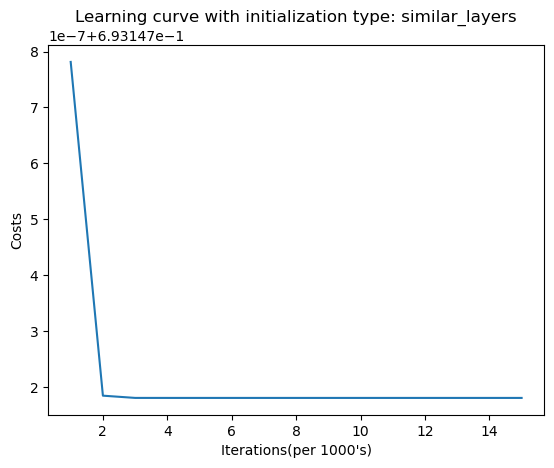

On Train set
Accuracy: 0.5
On Test set
Accuracy: 0.5


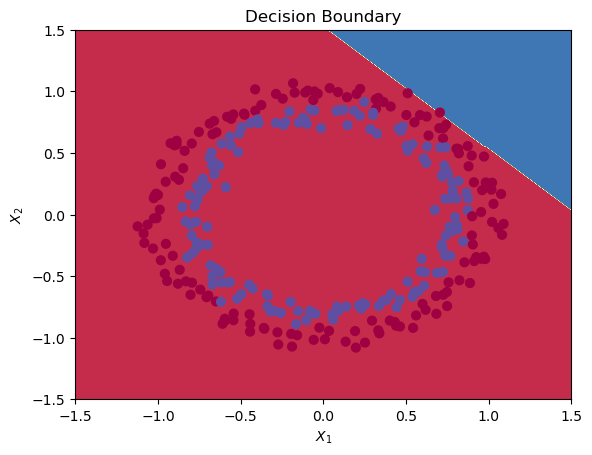

In [58]:
#Training with layer having same params - symmetry breaking problem - all layers behave similarly, we can check the gradients or actiavtion of the layers
final_params = nn_model(train_X, train_Y, learning_rate=0.01, num_iters=15000, print_cost=True, initialize="similar_layers")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.7013131193486029
Iteration: 1000, Cost: 0.6931111415511547
Iteration: 2000, Cost: 0.6931111410862328
Iteration: 3000, Cost: 0.6931111410862317
Iteration: 4000, Cost: 0.6931111410862316
Iteration: 5000, Cost: 0.6931111410862317
Iteration: 6000, Cost: 0.6931111410862316
Iteration: 7000, Cost: 0.6931111410862316
Iteration: 8000, Cost: 0.6931111410862316
Iteration: 9000, Cost: 0.6931111410862316
Iteration: 10000, Cost: 0.6931111410862316
Iteration: 11000, Cost: 0.6931111410862316
Iteration: 12000, Cost: 0.6931111410862316
Iteration: 13000, Cost: 0.6931111410862316
Iteration: 14000, Cost: 0.6931111410862316
Iteration: 14999, Cost: 0.6931111410862316


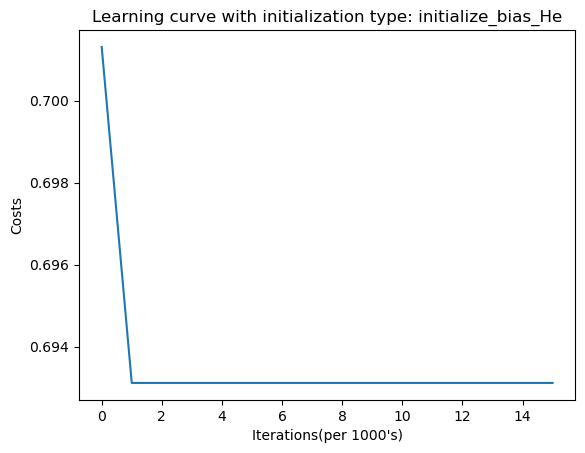

On Train set
Accuracy: 0.5
On Test set
Accuracy: 0.51


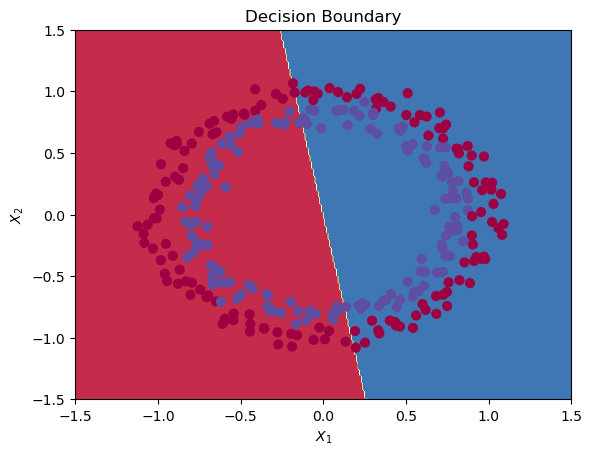

In [64]:
#Training with initialize_bias_He , making weights zero but bias random, symmetry will be broken but poor model, very slow training
final_params = nn_model(train_X, train_Y, learning_rate=0.1, num_iters=15000, print_cost=True, initialize="initialize_bias_He")

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)